# Homework 02

## Part 1 - Questions

### Question 1: 

What is the average rating of Ben & Jerry's ice cream?

* Who (population): Ben & Jerry's Flavors
* What (subject, discipline): Average Rating
* How much data do you need to do the analysis/work: Analayzing all 57 flavors and their respective ratings

### Question 2: 

What are the lowest and highest rated flavors and what is their difference in rating?

* Who (population): Ben & Jerry's Flavors
* What (subject, discipline): Lowest and Highest Ratings
* How much data do you need to do the analysis/work: Analayzing all 57 flavors and their respective ratings

### Question 3: 

How many flavors have "Chocolate" as one of its main components?

* Who (population): Ben & Jerry's Flavors
* What (subject, discipline): Ice Cream Components
* How much data do you need to do the analysis/work: Analyzing all 57 flavors and their respective subheadings

### Question 4: 

What are the common ingredients between the top 5 ice cream flavors?

* Who (population): Ben & Jerry's Flavors
* What (subject, discipline): Ratings and Ingredients
* How much data do you need to do the analysis/work: Analyzing all 57 flavors and first analyzing their ratings and then their ingredients

### Question 5: 

Is there a correlation between a flavor's rating and how often it's been rated?

* Who (population): Ben & Jerry's Flavors
* What (subject, discipline): Ratings and Rating Counts
* How much data do you need to do the analysis/work: Analyzing all 57 flavors and analyzing their ratings and rating counts

### Question 6: 

How many flavors use each ingredient used in Ben & Jerry's Ice cream?

* Who (population): Ben & Jerry's Flavors
* What (subject, discipline): Ingredients
* How much data do you need to do the analysis/work: Analyzing all 57 flavors and their ingredients

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

Those involved in the ice cream business (ex. supply, production, distribution) may collect or cite this data set.

## Part 2 - Selecting a Data Set, Adding Documentation

1. Name / Title: Ice Cream Dataset --> Ben & Jerry's
2. Link to Data: https://www.kaggle.com/tysonpo/ice-cream-dataset/version/3
3. Source / Origin: 
	* Author or Creator: Tyson Pond
	* Publication Date: October 4, 2020
	* Publisher: kaggle
	* Version or Data Accessed: 3
4. License: CC0: Public Domain
5. Can You Use this Data Set for Your Intended Use Case? Yes

## Format



### Overview

* Format: CSV
* Size: 38 KB
* Number of Records: 57

### Sample of Data




Here is the first five lines of data from the products file.

In [1]:
ice_cream_flavors = open('../data/raw/products.csv', 'r')
ice_cream_data = ice_cream_flavors.readlines()
header = ice_cream_data[:1]
rows = ice_cream_data[1:6]
print(header)
print(rows)

['key,name,subhead,description,rating,rating_count,ingredients\n']
['0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a Salted Caramel Core,"Find your way to the ultimate ice cream experience with our Cores. Whether your primal urges lead you to the center of salted caramel or directly to the blonde brownies, you’ll be in total control of your own ice cream destiny.",3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, BROWN SUGAR, SUGAR, MILK, WHEAT FLOUR, EGG YOLKS, CORN SYRUP, EGGS, BUTTER (CREAM, SALT), BUTTEROIL, PECTIN, SEA SALT, SOYBEAN OIL, VANILLA EXTRACT, GUAR GUM, SOY LECITHIN, BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODIUM BICARBONATE, CORN STARCH, MONOCALCIUM PHOSPHATE), BAKING SODA, SALT, CARRAGEENAN, LACTASE"\n', '1_bj,Netflix & Chilll\'d™,Peanut Butter Ice Cream with Sweet & Salty Pretzel Swirls & Fudge Brownies,"There’s something for everyone to watch on Netflix & flavors for everyone to enjoy from Ben & Jerry’s, so we’ve teamed up to b

### Fields or Column Headers

* Field/Column 1: key --> string
* Field/Column 2: name --> string
* Field/Column 3: subhead --> string
* Field/Column 4: description --> string
* Field/Column 5: rating --> float
* Field/Column 6: rating_count --> int
* Field/Column N7: ingredients --> string

## Part 3 - Extract / Transform

Below I extracted the name, subhead, rating, rating count, and ingredients columns from the data set. I also converted the rating data type to a float and the rating count data type to an int and capitalized all the strings. I read the data from these columns into a dictionary where the name is a key and the value is a list containing the subhead, rating, rating count, and ingredients.

In [2]:
import csv

with open('../data/raw/products.csv') as file:
  ice_cream_data = csv.reader(file)
  ice_cream_flavors = {}
  for row in ice_cream_data:
        if row[1] == 'name':
            continue
        flavor_info = []
        flavor_info.append(row[2].upper())
        flavor_info.append(float(row[4]))
        flavor_info.append(int(row[5]))
        flavor_info.append(row[6])
        ice_cream_flavors[row[1].upper()] = flavor_info
print(ice_cream_flavors)

{'SALTED CARAMEL CORE': ['SWEET CREAM ICE CREAM WITH BLONDE BROWNIES & A SALTED CARAMEL CORE', 3.7, 208, 'CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, BROWN SUGAR, SUGAR, MILK, WHEAT FLOUR, EGG YOLKS, CORN SYRUP, EGGS, BUTTER (CREAM, SALT), BUTTEROIL, PECTIN, SEA SALT, SOYBEAN OIL, VANILLA EXTRACT, GUAR GUM, SOY LECITHIN, BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODIUM BICARBONATE, CORN STARCH, MONOCALCIUM PHOSPHATE), BAKING SODA, SALT, CARRAGEENAN, LACTASE'], "NETFLIX & CHILLL'D™": ['PEANUT BUTTER ICE CREAM WITH SWEET & SALTY PRETZEL SWIRLS & FUDGE BROWNIES', 4.0, 127, 'CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, SUGAR, PEANUTS, WHEAT FLOUR, CANOLA OIL, EGG YOLKS, CORN STARCH, PEANUT OIL, COCOA POWDER, SALT, SOYBEAN OIL, INVERT CANE SUGAR, MILK FAT, EGGS, EGG WHITES, GUAR GUM, SOY LECITHIN, TAPIOCA STARCH, BAKING SODA, CARRAGEENAN, VANILLA EXTRACT, BARLEY MALT, MALTED BARLEY FLOUR'], 'CHIP HAPPENS': ['A COLD MESS OF CHOCOLATE ICE CREAM WITH FUDGE CHIPS & CRUNCHY PO

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



I used numpy and the statistics module to find the mean, median, and mode of the ice cream flavor ratings.

In [3]:
import numpy as np
import statistics
ice_cream_ratings = []
for ice_cream in ice_cream_flavors:
    ice_cream_ratings.append(ice_cream_flavors[ice_cream][1])
ice_cream_ratings_array = np.array(ice_cream_ratings)
mean = np.mean(ice_cream_ratings_array)
median = np.median(ice_cream_ratings_array)
mode = statistics.mode(ice_cream_ratings_array)
print("Mean: " + str(mean))
print("Median: " + str(median))
print("Mode: " + str(mode))

Mean: 4.3315789473684205
Median: 4.6
Mode: 4.7


#### Dispersion

I used "plain" python with the calculated mean to find the variance of the ice cream flavor ratings.

In [4]:
n = 0
for ice_cream in ice_cream_flavors:
    n += (ice_cream_flavors[ice_cream][1]-mean)**2
variance = n/56
print("Variance: " + str(variance))

Variance: 0.359699248120301


#### Outliers


I sorted the ice cream flavors dictionary I created earlier to find both the lowest rated ice cream flavor and the highest rated ice cream flavor and calculated the range from those ratings.

In [5]:
ascending = sorted(ice_cream_flavors.keys(), key=lambda x:ice_cream_flavors.get(x)[1])
min = ice_cream_flavors[ascending[0]][1]
print("Min: " + str(min) + " (" + ascending[0] + ")")

descending = sorted(ice_cream_flavors.keys(), key=lambda x:ice_cream_flavors.get(x)[1], reverse = True)
max = ice_cream_flavors[descending[0]][1]
print("Max: " + str(max) + " (" + descending[0] + ")")

range = max - min
print("Range: "+ str(range))

Min: 1.8 (CHOCOLATE CHIP COOKIE DOUGH CORE)
Max: 5.0 (CHOCOLATE PEANUT BUTTER SPLIT)
Range: 3.2


Using the interquartile range, I found outlier ice cream flavor ratings.

In [6]:
ice_cream_ratings = sorted(ice_cream_ratings, key = float)
ice_cream_ratings_lower = ice_cream_ratings[:27]
ice_cream_ratings_lower_array = np.array(ice_cream_ratings_lower)
ice_cream_ratings_higher = ice_cream_ratings[28:]
ice_cream_ratings_higher_array = np.array(ice_cream_ratings_higher)
q1 = np.median(ice_cream_ratings_lower_array)
print("Q1: " + str(q1))
q3 = np.median(ice_cream_ratings_higher_array)
print("Q3: " + str(q3))
iqr = q3 - q1
lower = q1-iqr*1.5
print("Lower Limit: " + str(lower))
upper = q3+iqr*1.5
print("Upper Limit: " + str(upper))
print("")
print("Outliers")
for ice_cream_flavor in ice_cream_flavors:
    if ice_cream_flavors[ice_cream_flavor][1] < lower or ice_cream_flavors[ice_cream_flavor][1] > upper:
        print(ice_cream_flavor + ": " + str(ice_cream_flavors[ice_cream_flavor][1]))

Q1: 4.0
Q3: 4.7
Lower Limit: 2.9499999999999997
Upper Limit: 5.75

Outliers
COFFEE TOFFEE BAR CRUNCH: 2.9
CHOCOLATE CHIP COOKIE DOUGH CORE: 1.8


###  Analysis on Categorical Data

#### Frequency

I calculated how many flavors have "chocolate" as a main component by going through the ice cream flavors dictionary and analyzing the subheadings. If the subheading mentioned the word "chocolate", I added it to the count.

In [7]:
n = 0
for ice_cream in ice_cream_flavors:
    if "CHOCOLATE" in ice_cream_flavors[ice_cream][0]:
        n += 1
print("Flavors with Chocolate: " + str(n))

Flavors with Chocolate: 30


I got the common ingredients between the top 5 rated flavors of ice cream by looking at the list I sorted earlier, of the ice cream flavor ratings in descending order. From that list, I extracted just the first 5 elements of the list and then furthermore just extracted the ingredients string from these 5 elements and put it into a new list. I then iterated over this list, first splitting the ingredients string based on commas (with the exception of where there were parentheses used), and then adding each ingredient to a dictionary either as a new ingredient with a starting count of 1 or increasing the count of a previously added ingredient. Finally, I iterated over this dictionary and whichever ingredients had a value of 5 (which would mean that this ingredient was in all 5 of the top flavors), I printed out as the common ingredients.

In [16]:
import re

top_five = descending[:5]
print(top_five)
top_five_ingredients = []
for ice_cream_flavor in top_five:
    top_five_ingredients.append(ice_cream_flavors[ice_cream_flavor][3])
ingredients_count = {}
for ingredients_list in top_five_ingredients:
    ingredients = re.split(r', \s*(?![^()]*\))', ingredients_list)
    for ingredient in ingredients:
        if '(' in ingredient:
            ingredient = ingredient[:(ingredient.index('(')-1)]
        elif '.' in ingredient:
            ingredient = ingredient[:(ingredient.index('.'))]
        if ingredient in ingredients_count:
            ingredients_count[ingredient] += 1
        else:
            ingredients_count[ingredient] = 1
print("Common Ingredients In Top 5 Flavors")
for ingredient in ingredients_count:
    if ingredients_count[ingredient] == 5:
        print(ingredient)

['CHOCOLATE PEANUT BUTTER SPLIT', 'ICE CREAM SAMMIE', 'PEANUT BUTTER HALF BAKED®', 'COFFEE COFFEE BUZZBUZZBUZZ!®', 'NEW YORK SUPER FUDGE CHUNK®']
Common Ingredients In Top 5 Flavors
CREAM
SKIM MILK
LIQUID SUGAR
WATER
SUGAR
EGG YOLKS
GUAR GUM
SOY LECITHIN
VANILLA EXTRACT
CARRAGEENAN


#### Unique Values

Each flavor has a unique name so there are 57 unique keys in the ice cream flavors dictionary.

In [9]:
print(ice_cream_flavors.keys())

dict_keys(['SALTED CARAMEL CORE', "NETFLIX & CHILLL'D™", 'CHIP HAPPENS', 'CANNOLI', 'GIMME S’MORE!™', 'PEANUT BUTTER HALF BAKED®', 'BERRY SWEET MASCARPONE', 'CHOCOLATE PEANUT BUTTER SPLIT', "JUSTICE REMIX'D ™", 'BOOTS ON THE MOOOO’N™', 'AMERICONE DREAM®', 'BOURBON PECAN PIE', 'BREWED TO MATTER™', 'CARAMEL CHOCOLATE CHEESECAKE', 'CHERRY GARCIA®', "CHILLIN' THE ROAST™", 'CHOCOLATE CHIP COOKIE DOUGH', 'CHOCOLATE FUDGE BROWNIE', 'CHOCOLATE SHAKE IT™', 'CHOCOLATE THERAPY®', 'CHUBBY HUBBY®', 'CHUNKY MONKEY®', 'CINNAMON BUNS®', 'COFFEE COFFEE BUZZBUZZBUZZ!®', 'COFFEE TOFFEE BAR CRUNCH', 'COLD BREW CARAMEL LATTE', 'EVERYTHING BUT THE...®', 'GLAMPFIRE TRAIL MIX™', 'HALF BAKED®', 'ICE CREAM SAMMIE', 'MILK & COOKIES', 'MINT CHOCOLATE COOKIE', 'MINTER WONDERLAND™', 'NEW YORK SUPER FUDGE CHUNK®', 'OAT OF THIS SWIRLED™', 'PEANUT BUTTER CUP', 'PEANUT BUTTER WORLD®', 'PHISH FOOD®', 'PISTACHIO PISTACHIO', 'PUMPKIN CHEESECAKE', 'RED, WHITE & BLUEBERRY', "S'MORES", 'SALTED CARAMEL ALMOND', 'STRAWBERRY CH

## Part 5 - Visualizations



This visualization plots ratings in ascending order versus their rating count using a line graph. I used my previously sorted list of the ice cream flavor ratings in ascending order and my ice cream flavors dictionary to get the values needed. From those values, I created two new lists, one for the ratings and the other for rating counts and used those to make my plot.

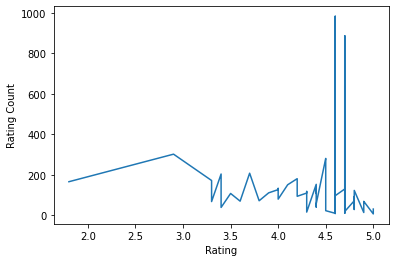

In [10]:
import matplotlib.pyplot as plt
ratings_count = []
for ice_cream_flavor in ascending:
    ratings_count.append(ice_cream_flavors[ice_cream_flavor][2])
plt.plot(ice_cream_ratings, ratings_count)
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

This visualization plots each ingredient versus how many flavors it's used in using a horizontal bar graph. I used my ice cream flavors dictionary to get each flavor's ingredient list and added each ingredient to a new dictionary either as a new ingredient with a starting count of 1 or increasing the count of a previously added ingredient. From this dictionary, I then plotted the keys (which are the ingredient names) against the values (which are how many time said ingredient is used).

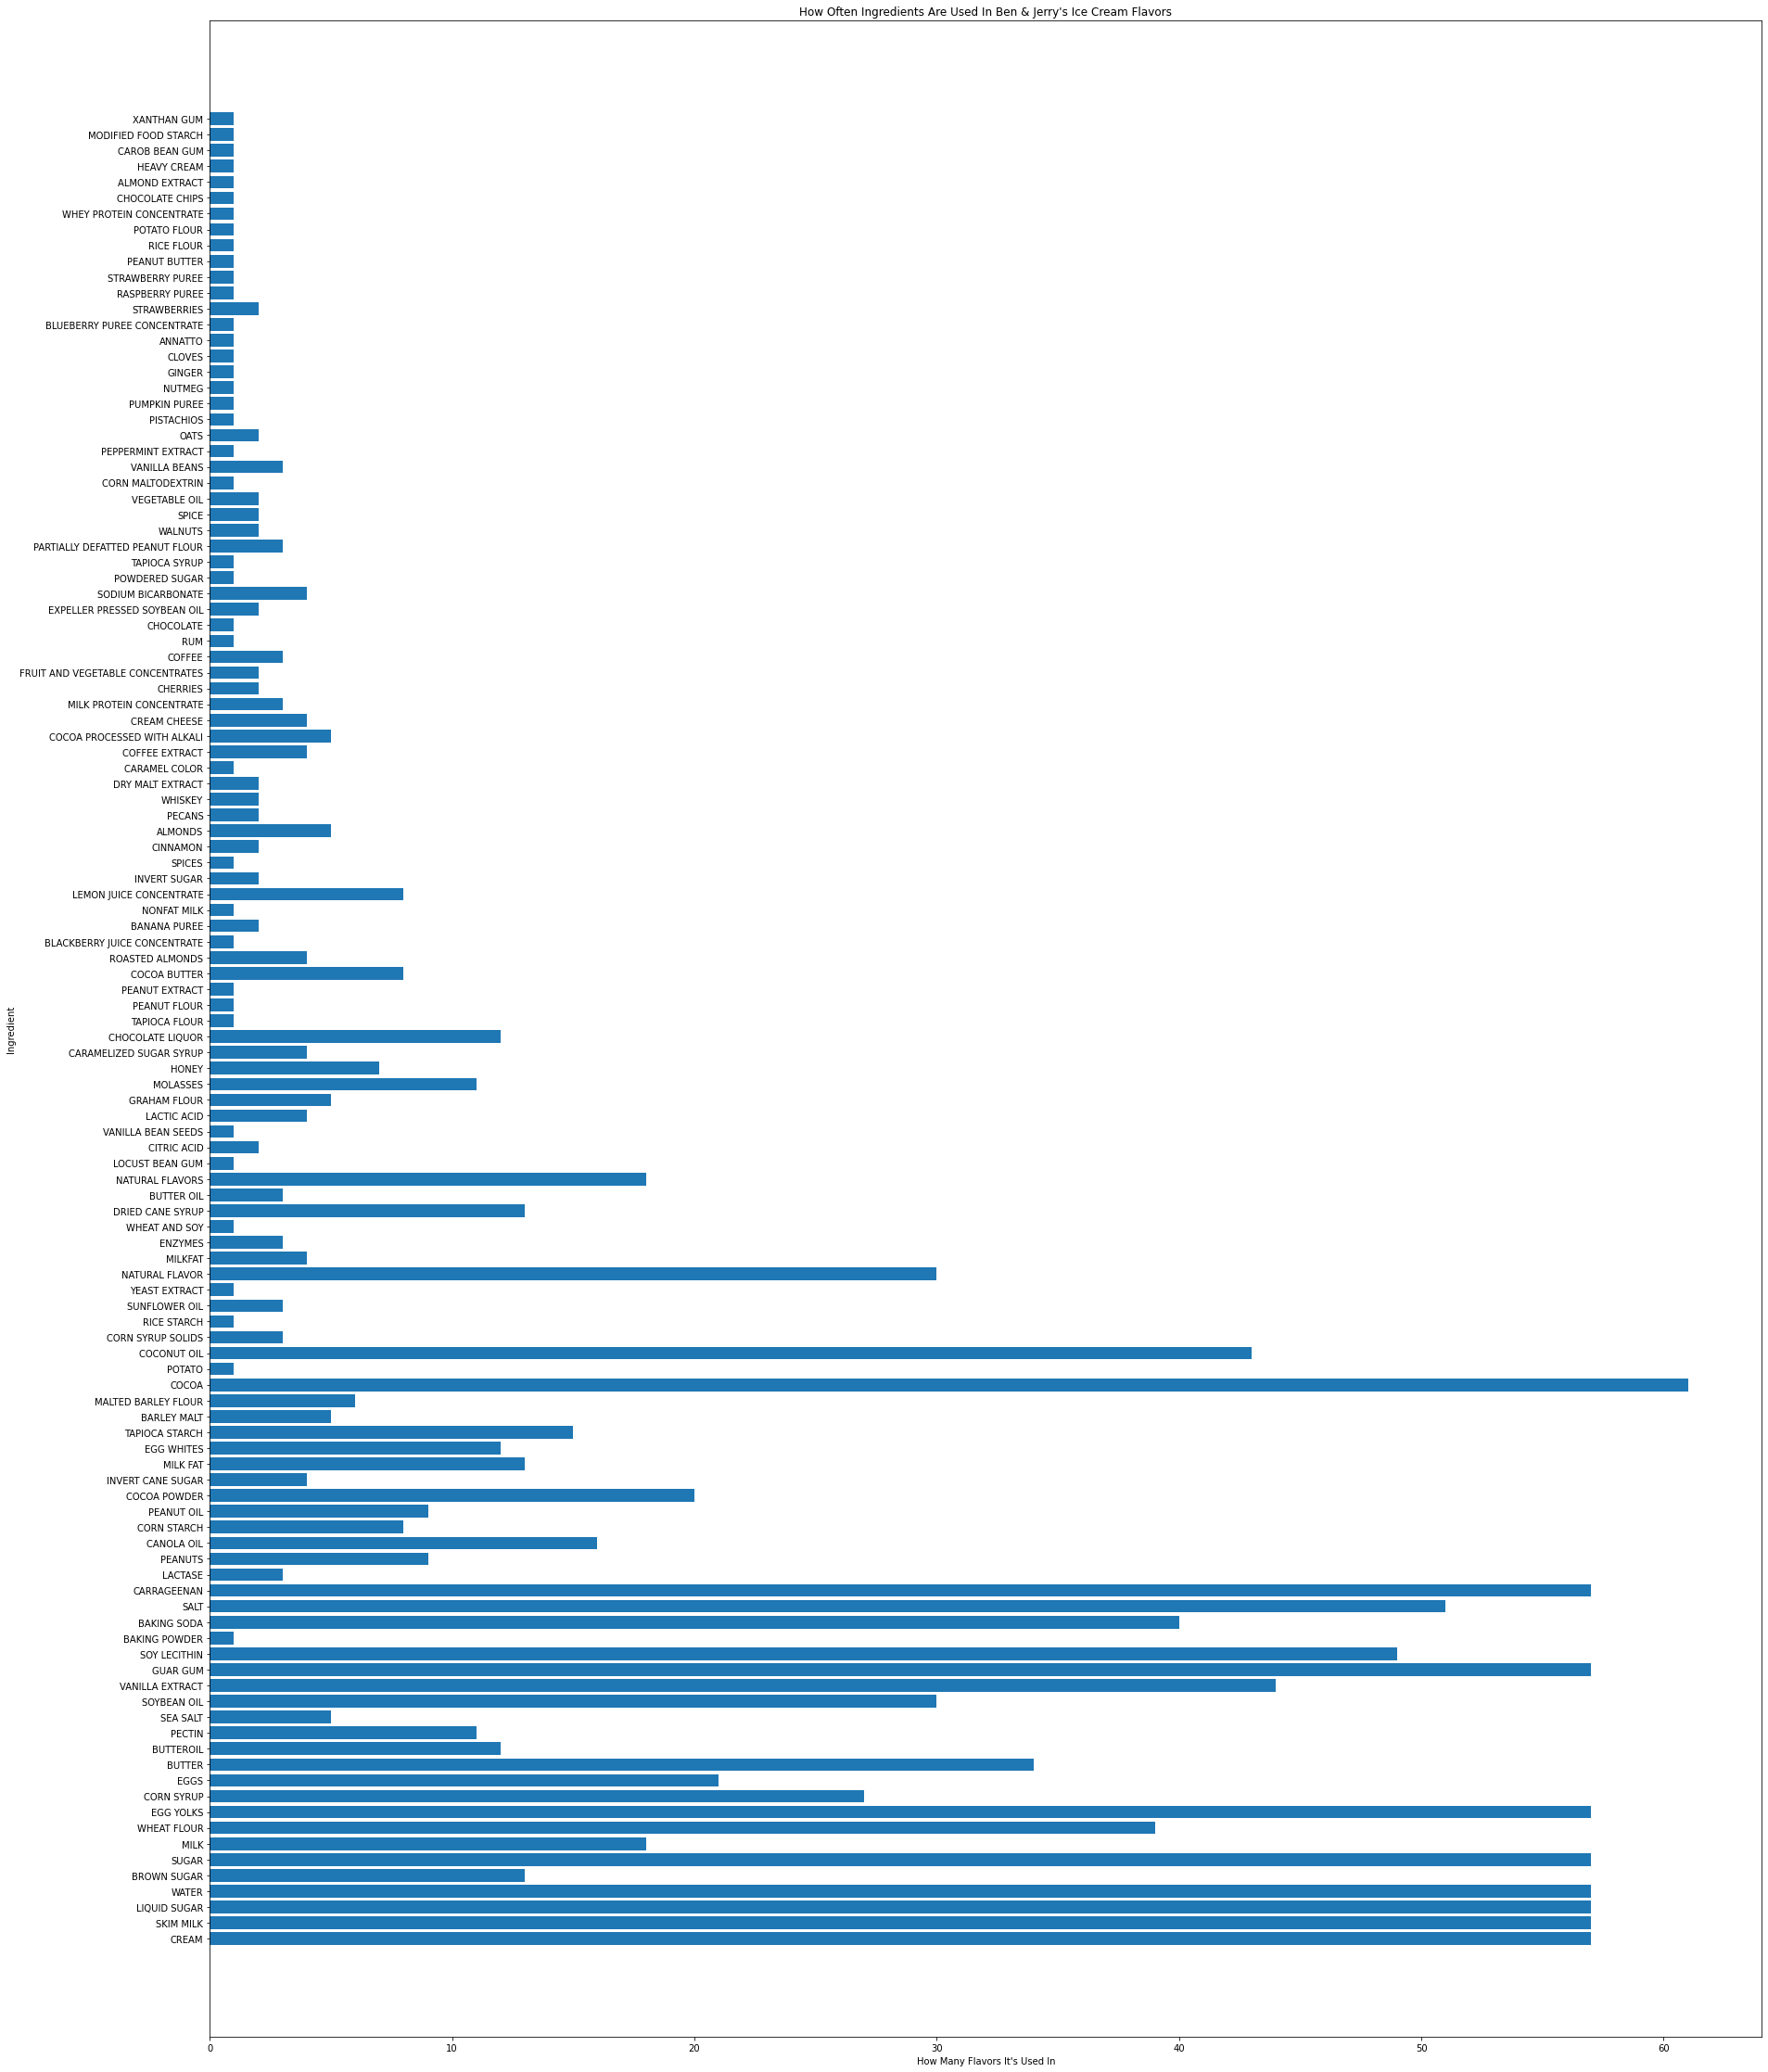

In [12]:
import re

ingredients_count_all = {}
for ice_cream_flavor in ice_cream_flavors:
    ingredients = re.split(r', \s*(?![^()]*\))', ice_cream_flavors[ice_cream_flavor][3])
    for ingredient in ingredients:
        if '(' in ingredient:
            ingredient = ingredient[:(ingredient.index('(')-1)]
        elif '.' in ingredient:
            ingredient = ingredient[:(ingredient.index('.'))]
        if ingredient in ingredients_count_all:
            ingredients_count_all[ingredient] += 1
        else:
            ingredients_count_all[ingredient] = 1
ingredients = list(ingredients_count_all.keys())
ingredient_counts = list(ingredients_count_all.values())
plt.barh(ingredients, ingredient_counts)
plt.title("How Often Ingredients Are Used In Ben & Jerry's Ice Cream Flavors")
plt.ylabel('Ingredient')
plt.xlabel("How Many Flavors It's Used In")
plt.rcParams['figure.figsize'] = [30, 40]
plt.show()

## Part 6 - Conclusion

### Question 1: 

What is the average rating of Ben & Jerry's ice cream?

The average rating is 4.3315789473684205 which you get via the mean of the ratings calculation which falls under measuring the central tendency.

### Question 2: 

What are the lowest and highest rated flavors and what is their difference in rating?

The lowest rated flavor is Chocolate Chip Cookie Dough Core at a 1.8 and the highest rated flavor is Chocolate Peanut Butter Split at a 5.0. The lowest ranked flavor, however, is an outlier as it falls below the lower limit which is a rating of 2.9499999999999997. I got these answers via the min and max values of the ratings as well as finding the outliers which falls under examining range, min, max, and outliers.

### Question 3: 

How many flavors have "Chocolate" as one of its main components?

There are 30 flavors that have "chocolate" as one of its main components. I got these answers via finding the frequency of how often "chocolate" was mentioned in subheadings which falls under calculating categorical data.

### Question 4: 

What are the common ingredients between the top 5 ice cream flavors?

The common ingredients between the top 5 ice cream flavors are cream, skim milk, liquid sugar, water, sugar, egg yolks, guar gum, soy lecithin, vanilla extract, and carrageenan. I got these answers via getting the top 5 rated ice cream flavors and finding how frequently each ingredient is used between these top 5 flavors which falls under calculating categorical data.

### Question 5: 

Is there a correlation between a flavor's rating and how often it's been rated?

I found that there is no clear correlation between a flavor's rating and how often it's rated as the line is plotted in a seemingly random way. I got this answer via plotting the ratings in ascending order versus their corresponding rating counts using a line graph which falls under visualizations.

### Question 6: 

How many flavors use each ingredient used in Ben & Jerry's Ice cream?

The graph I made shows how many flavors use each ingredient in Ben & Jerry's Ice cream with cream, skim milk, liquid sugar, water, sugar, egg yolks, guar gum, and carrageenan being the most used ingredients (they are used in every ice cream flavor) and baking powder, potato, rice starch, yeast extract, wheat and soy, locust bean gum, vanilla bean seeds, tapioca flour, peanut flour, peanut extract, black berry juice concentrate, nonfat milk, spices, caramel color, rum, chocolate, powdered sugar, tapioca syrup, corn maltodextrin, peppermint extract, pistachios, pumpkin puree, nutmeg, ginger, cloves, annatto, bluberry puree concentrate, raspberry puree, strawberry puree, peanut butter, rice flour, potato flour, whey protein concentrate, chocolate chips, almond extract, heavy cream, carob bean gum, modified food starch, and xantham gum being the least used ingredients (they are each only used in 1 flavor). I got this answer via plotting each ingredient versus how many flavors it's used in which falls under visualizations.